In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
import pandas as pd

In [54]:
data = pd.read_csv ('C:/Users\harsh\OneDrive\Python Projects\Dataset\Video_Games_Sales.csv').dropna() 
#dropping the na values at the import stage itself
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [55]:
print(data.shape)
print(data.columns)

(6825, 16)
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [56]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB
None


In [57]:
data['User_Score'] = data['User_Score'].astype('float64')
data['Year_of_Release'] = data['Year_of_Release'].astype('int64')
data['User_Count'] = data['User_Count'].astype('int64')
data['Critic_Count'] = data['Critic_Count'].astype('int64')

We are seperating the columns that we will need for analysis

In [58]:
analyze = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
data[analyze].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


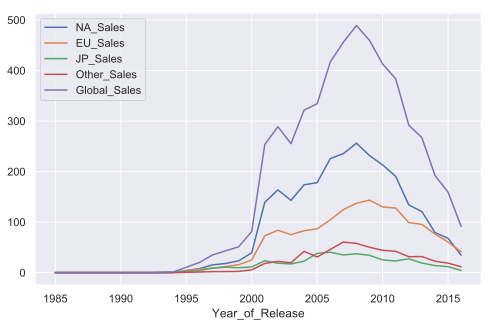

In [59]:
data[[x for x in data.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

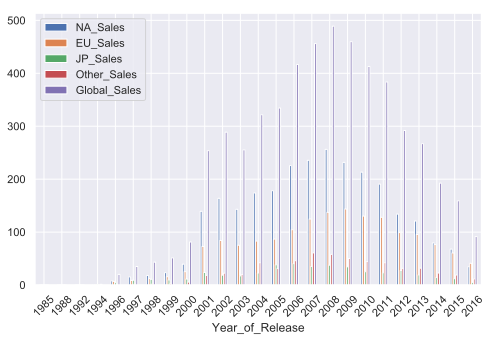

In [60]:
data[[x for x in data.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

Here only plot() from matplotlib has been used. 
Using kind we can also convert the line graph to a bar graph

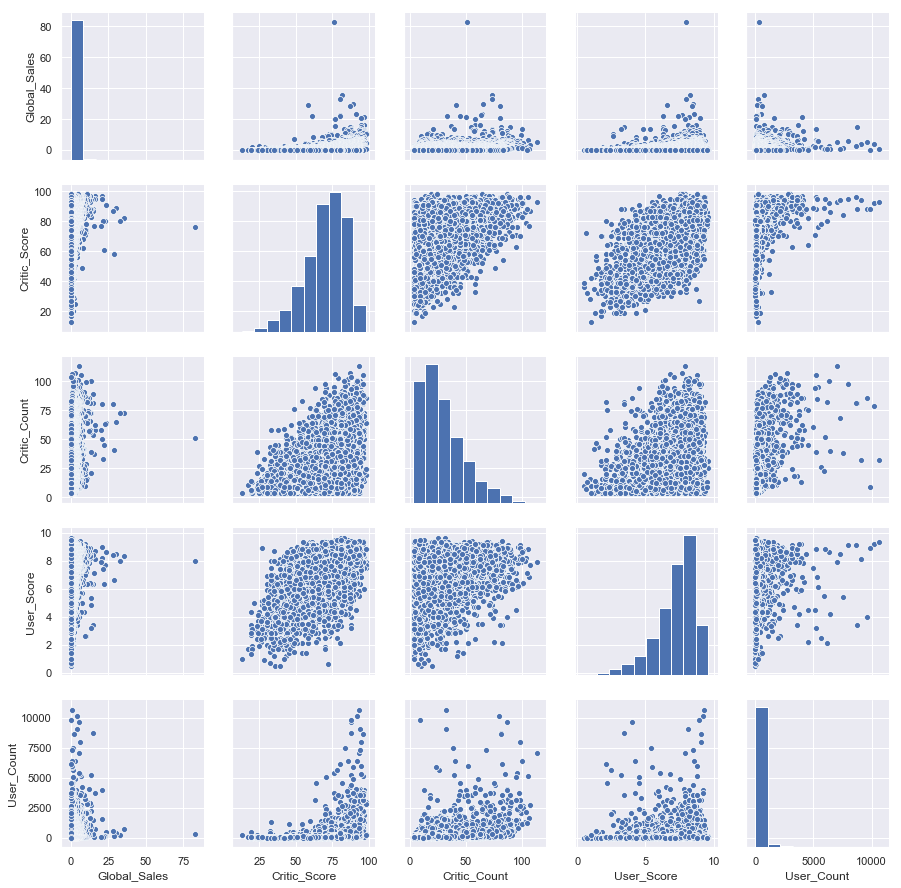

In [61]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

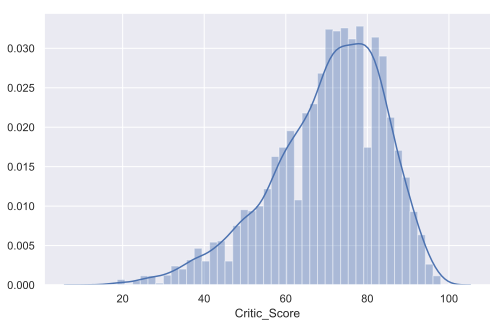

In [62]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(data['Critic_Score']);

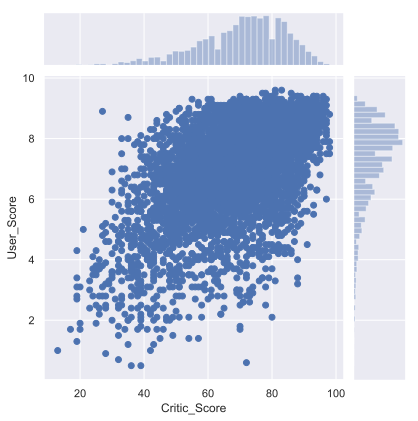

In [63]:
#joint plot is a crossplot between a scatter plot and histogram
sns.jointplot(x='Critic_Score', y='User_Score', data=data, kind='scatter');

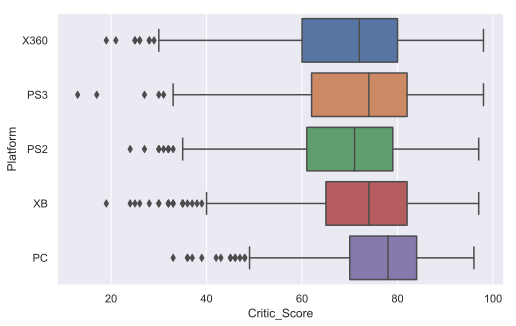

In [64]:
top_platforms = data['Platform'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=data[data['Platform'].isin(top_platforms)], orient="h");

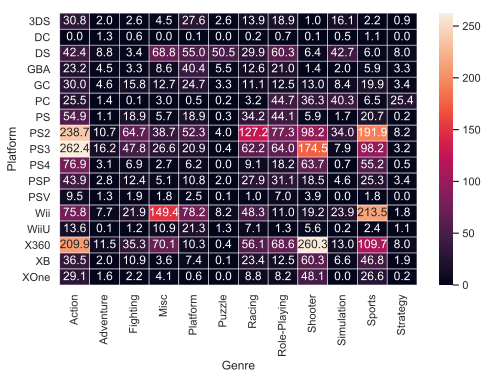

In [65]:
platform_genre_sales = data.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

### Plotly for Visualization

In [66]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [67]:
years_data = data.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    data.groupby('Year_of_Release')[['Name']].count())
years_data.columns = ['Global_Sales', 'Number_of_Games']

In [68]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(
    x=years_data.index,
    y=years_data['Global_Sales'],
    name='Global Sales'
)

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_data.index,
    y=years_data['Number_of_Games'],
    name='Number of games released'
)

# Define the data array
newdata = [trace0, trace1]

# Set the title
layout = {'title': 'Statistics for video games'}

# Create a Figure and plot it
fig = go.Figure(data=newdata, layout=layout)
iplot(fig, show_link=False)

In [69]:
# Do calculations and prepare the dataset
platforms_data = data.groupby('Platform')[['Global_Sales']].sum().join(
    data.groupby('Platform')[['Name']].count()
)
platforms_data.columns = ['Global_Sales', 'Number_of_Games']
platforms_data.sort_values('Global_Sales', ascending=False, inplace=True)

In [70]:
# Create a bar for the global sales
trace0 = go.Bar(
    x=platforms_data.index,
    y=platforms_data['Global_Sales'],
    name='Global Sales'
)

# Create a bar for the number of games released
trace1 = go.Bar(
    x=platforms_data.index,
    y=platforms_data['Number_of_Games'],
    name='Number of games released'
)

# Get together the data and style objects
data2 = [trace0, trace1]
layout = {'title': 'Market share by gaming platform'}

# Create a `Figure` and plot it
fig = go.Figure(data=data2, layout=layout)
iplot(fig, show_link=False)

In [89]:
fig = []

# Create a box trace for each genre in our dataset
for genre in data.Genre.unique():
    fig.append(
        go.Box(y=data[data.Genre == genre].Critic_Score, name=genre)
    )
    
# Visualize
iplot(fig, show_link=False)